### A.N.D intern Miner project. 
##### Develop a model which predicts the price of used cars. By Gaurav Vashist

In [1]:
#  import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


###  Data Collection by extracting the data from the given dataSet. (zip) file.

In [2]:
df = pd.read_csv("D:/GAURAV NOTES/notes 1965/A.N.D projects/used car price/used_car_dataset.csv")
df

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017


In [3]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


###  check the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [6]:
df.describe()


,year_of_manufacture
count,2105.000000
mean,2017.022803
std,2.818066
min,2004.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2022.000000


In [8]:
missing_values = df.isnull().sum()
print(missing_values)


car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64


In [10]:
duplicates = df.duplicated().sum()
print(duplicates)


92


In [14]:
# If you want to keep none of the occurrences and remove all duplicates
df = df.drop_duplicates(keep=False)
df.head(150)

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
158,Maruti Suzuki Ciaz Alpha 1.4 AT,₹ 8.85 Lakh,"38,500 km",Petrol,Ahmedabad,2020
159,Maruti Suzuki Wagon R 1.0 LXI CNG,₹ 4.84 Lakh,"20,583 km",CNG,Pune,2018
160,Skoda Rapid Style 1.5 TDI AT,₹ 7.15 Lakh,"81,325 km",Diesel,Kolkata,2016
161,Maruti Suzuki Baleno Zeta 1.2,₹ 5.9 Lakh,"35,000 km",Petrol,Ahmedabad,2017


In [15]:
df.columns

Index(['car_name', 'car_price_in_rupees', 'kms_driven', 'fuel_type', 'city',
       'year_of_manufacture'],
      dtype='object')

In [16]:
# for the unique value run the for loop command. 
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in car_name: ['Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2020]'
 'Maruti Suzuki Alto 800 Lxi' 'Tata Safari XZ Plus New'
 'Maruti Suzuki Ciaz ZXI+'
 'Jeep Compass Sport Plus 1.4 Petrol [2019-2020]'
 'Maruti Suzuki Eeco 5 STR WITH A/C+HTR [2019-2020]'
 'Hyundai Creta SX Plus 1.6 AT CRDI' 'Maruti Suzuki Ertiga VXi AT'
 'Toyota Etios Liva G' 'Renault Kwid 1.0 RXT AMT Opt [2016-2019]'
 'Maruti Suzuki Ciaz VDi+ SHVS' 'Maruti Suzuki Alto 800 LXi (O)'
 'Chevrolet Optra Magnum LS 2.0 TCDi' 'Maruti Suzuki Vitara Brezza VDi'
 'Jeep Compass Longitude 2.0 Diesel [2017-2020]'
 'Toyota Corolla Altis VL AT Petrol'
 'Hyundai Elite i20 Magna Executive 1.2' 'Mercedes-Benz EQC 400 4MATIC'
 'Ford EcoSport Titanium 1.5L Ti-VCT' 'Hyundai i10 Magna 1.2 Kappa2'
 'Hyundai Creta 1.6 SX Plus Petrol Special Edition' 'Porsche 718 Boxster'
 'Kia Seltos HTE 1.5 Diesel'
 'Maruti Suzuki Ciaz Alpha Hybrid 1.5 AT [2018-2020]'
 'Renault Kwid 1.0 RXL [2017-2019]' 'BMW 3 Series 320d Luxury Line'
 'Maruti Su

### Data Preprocessing.

In [19]:
df['Company'] = df['car_name'].str.split(expand=True)[0]
df

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,Company
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,Hyundai
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,Maruti
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,Tata
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,Maruti
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,Jeep
...,...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015,Ford
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013,MINI
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018,Hyundai
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017,Maruti


In [ ]:
del df['car_name']
df

In [23]:
print(df.columns)


Index(['car_price_in_rupees', 'kms_driven', 'fuel_type', 'city',
       'year_of_manufacture', 'Company'],
      dtype='object')


In [25]:
print(df['Company'].unique())


['Hyundai' 'Maruti' 'Tata' 'Jeep' 'Toyota' 'Renault' 'Chevrolet'
 'Mercedes-Benz' 'Ford' 'Porsche' 'Kia' 'BMW' 'Honda' 'Audi' 'MG' 'Skoda'
 'Volkswagen' 'Volvo' 'Mahindra' 'Nissan' 'Land' 'Isuzu' 'Jaguar' 'MINI'
 'Datsun' 'Fiat' 'Citroen' 'Bentley']


In [26]:
print(len(df.columns))
df.columns

6


Index(['car_price_in_rupees', 'kms_driven', 'fuel_type', 'city',
       'year_of_manufacture', 'Company'],
      dtype='object')

## feature selection. (correlation.)

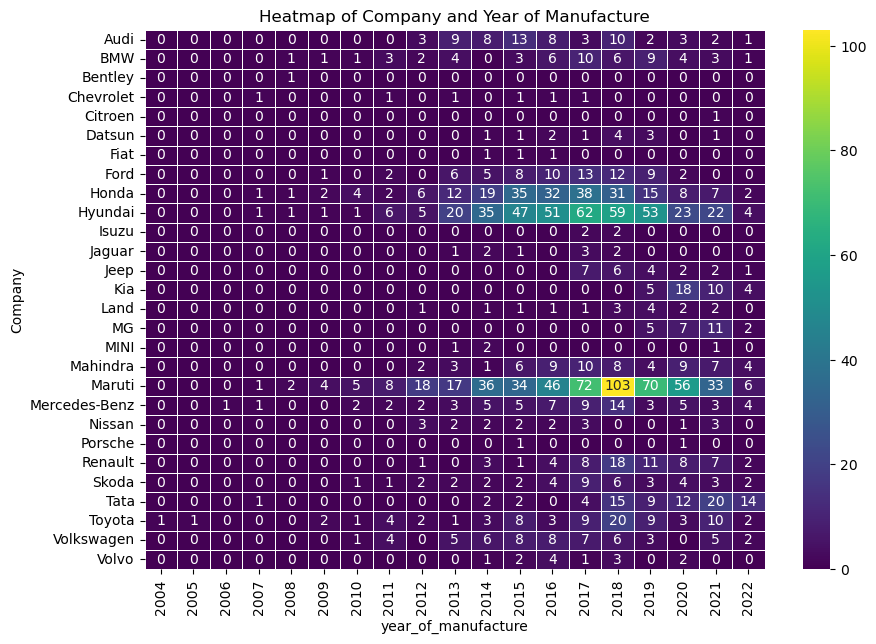

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
selected_columns = ['Company', 'year_of_manufacture']

# Create a subset DataFrame with selected columns
subset_df = df[selected_columns]

# Create a pivot table for the heatmap
heatmap_data = subset_df.pivot_table(index='Company', columns='year_of_manufacture', aggfunc=len, fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', linewidths=0.5)
plt.title("Heatmap of Company and Year of Manufacture")
plt.show()


In [40]:
X = df[['Company','city','year_of_manufacture','fuel_type','kms_driven']]
Y = df[['car_price_in_rupees']]

In [41]:
X.head()

,Company,city,year_of_manufacture,fuel_type,kms_driven
0,Hyundai,Mumbai,2016,Petrol,"22,402 km"
1,Maruti,Kolkata,2019,Petrol,"10,344 km"
2,Tata,Bangalore,2021,Diesel,"12,999 km"
3,Maruti,Thane,2016,Petrol,"45,000 km"
4,Jeep,Kolkata,2019,Petrol,"11,193 km"


In [42]:
Y.head()

,car_price_in_rupees
0,₹ 4.45 Lakh
1,₹ 2.93 Lakh
2,₹ 22.49 Lakh
3,₹ 6.95 Lakh
4,₹ 12 Lakh


## EDA

<Figure size 1500x1000 with 0 Axes>

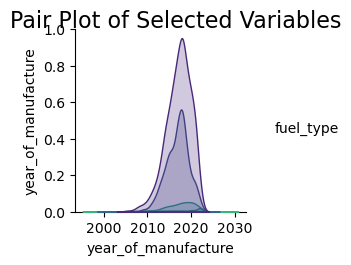

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and Y are your predictor and target variables
data_for_plot = pd.concat([X, Y], axis=1)

# Create a pair plot
plt.figure(figsize=(15, 10))
sns.pairplot(data_for_plot, hue='fuel_type', palette='viridis', markers=["o", "s", "D"], diag_kind='kde')
plt.suptitle("Pair Plot of Selected Variables", y=1.02, fontsize=16)
plt.show()


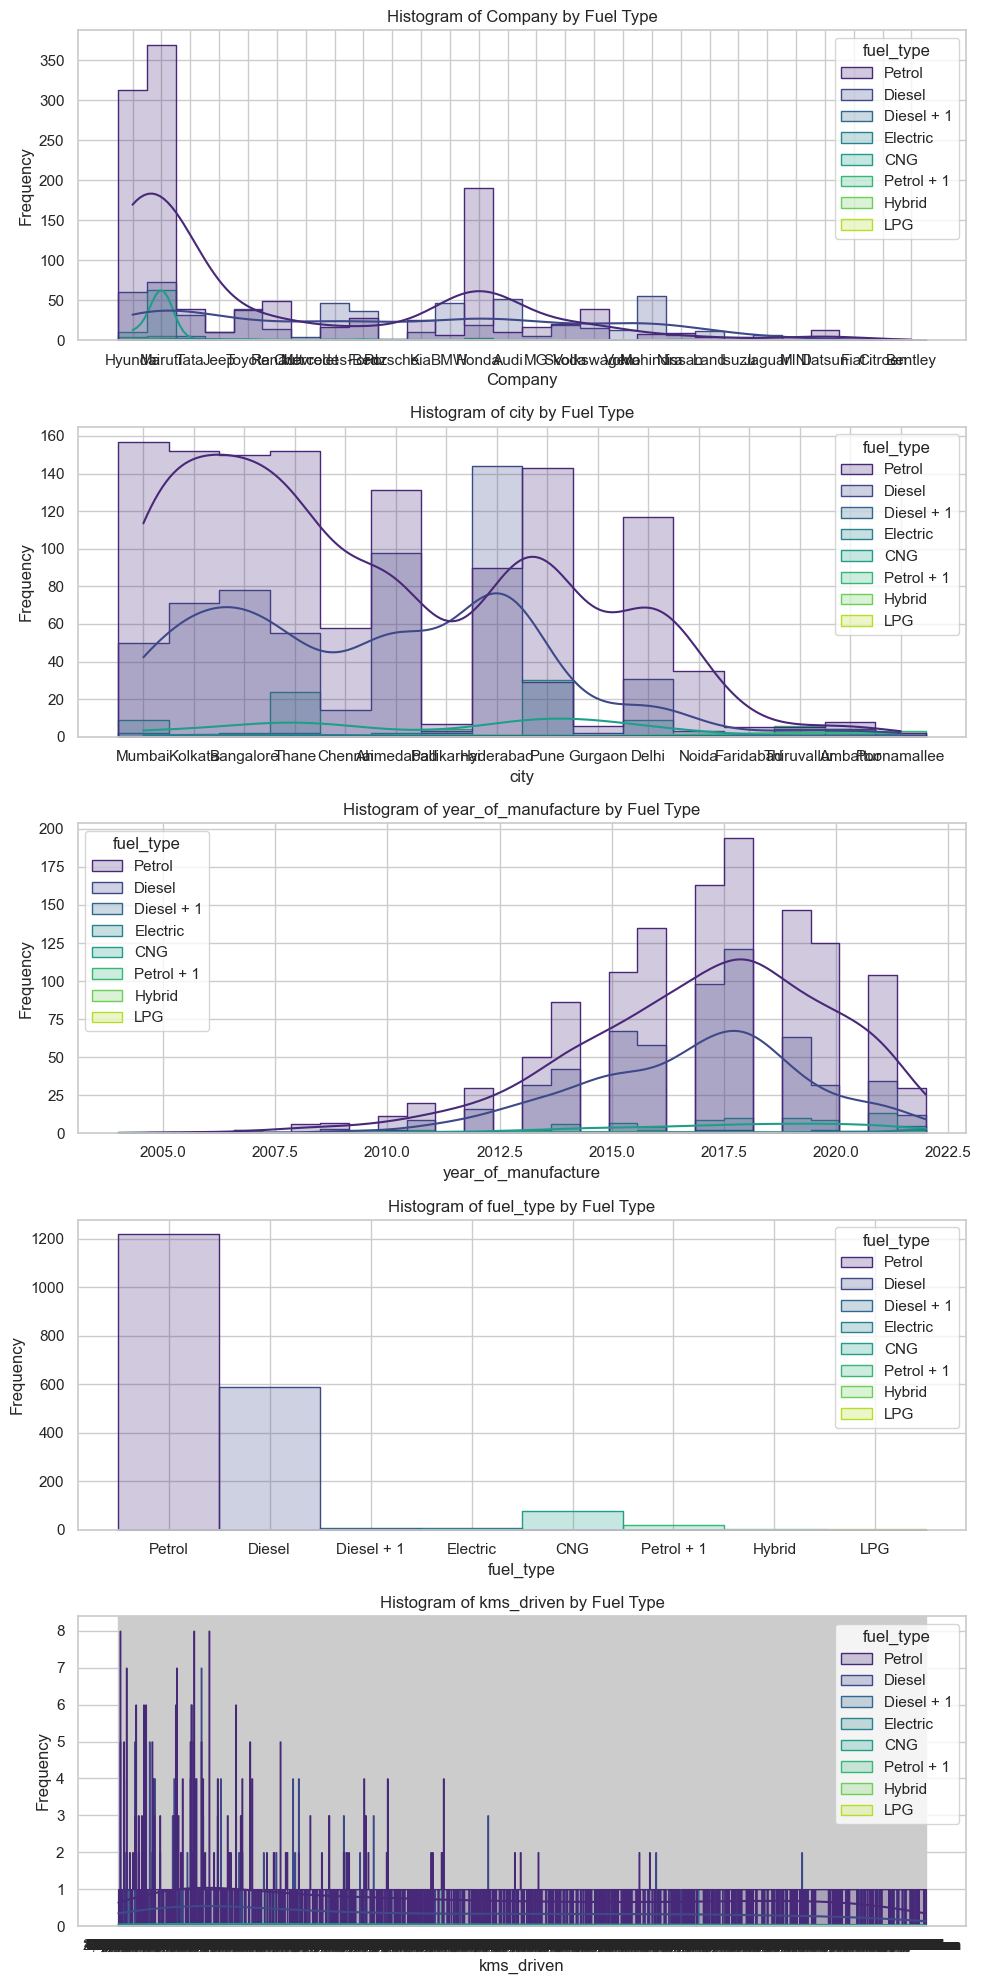

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X is your predictor variables
data_for_plot = pd.concat([X, Y], axis=1)

# Set the style and context for better aesthetics
sns.set(style="whitegrid")
sns.set_palette("husl")

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(X.columns), ncols=1, figsize=(10, 4 * len(X.columns)))

# Plot histograms with labels for each variable
for i, col in enumerate(X.columns):
    sns.histplot(data_for_plot, x=col, hue='fuel_type', kde=True, ax=axes[i], palette='viridis', element='step', common_norm=False)
    axes[i].set_title(f'Histogram of {col} by Fuel Type')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    # Annotate the bars with the count
    for patch in axes[i].patches:
        height = patch.get_height()
        width = patch.get_width()
        x = patch.get_x()
        axes[i].text(x + width / 2, height, f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Data Splitting

In [52]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2)

In [53]:
# Print the shape of the training set
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

X_train: (1536, 5)
Y_train: (1536, 1)
X_test: (385, 5)
Y_test: (385, 1)


### Model Selection , Training and Evaluation.

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming df is your DataFrame with 'Company', 'city', 'year_of_manufacture', 'fuel_type', 'kms_driven', and 'car_price_in_rupees' columns
# Assuming X and Y are your predictor and target variables
X = df[['Company', 'city', 'year_of_manufacture', 'fuel_type', 'kms_driven']]
Y = df['car_price_in_rupees']

# Use .loc to avoid SettingWithCopyWarning
X.loc[:, 'kms_driven'] = X['kms_driven'].str.replace(' km', '').str.replace(',', '').astype(float)

# Preprocess the target variable
Y = Y.str.replace('₹', '').str.replace('Crore', '').str.replace('Lakh', '').str.replace(',', '').astype(float)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['Company', 'city', 'fuel_type']
numeric_features = ['year_of_manufacture', 'kms_driven']

# Create transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', 'passthrough')  # You can add an imputer if necessary
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])

# Create pipeline with preprocessor and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model performance (you can use different metrics based on your task)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


# Avoiud this warniong as this is due to the iloc method which is used while doing the conversion but 
# it will not causing any error to the output . so the result is correct and desriable

C:\Users\gaura\AppData\Local\Temp\ipykernel_11428\3490835094.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'kms_driven'] = X['kms_driven'].str.replace(' km', '').str.replace(',', '').astype(float)
C:\Users\gaura\AppData\Local\Temp\ipykernel_11428\3490835094.py:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, 'kms_driven'] = X['kms_driven'].str.replace(' km', '').str.replace(',', '').astype(float)
D:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renam

Mean Squared Error: 11152921.61339095
R-squared: -91330.26993038332


## final graphical representation.

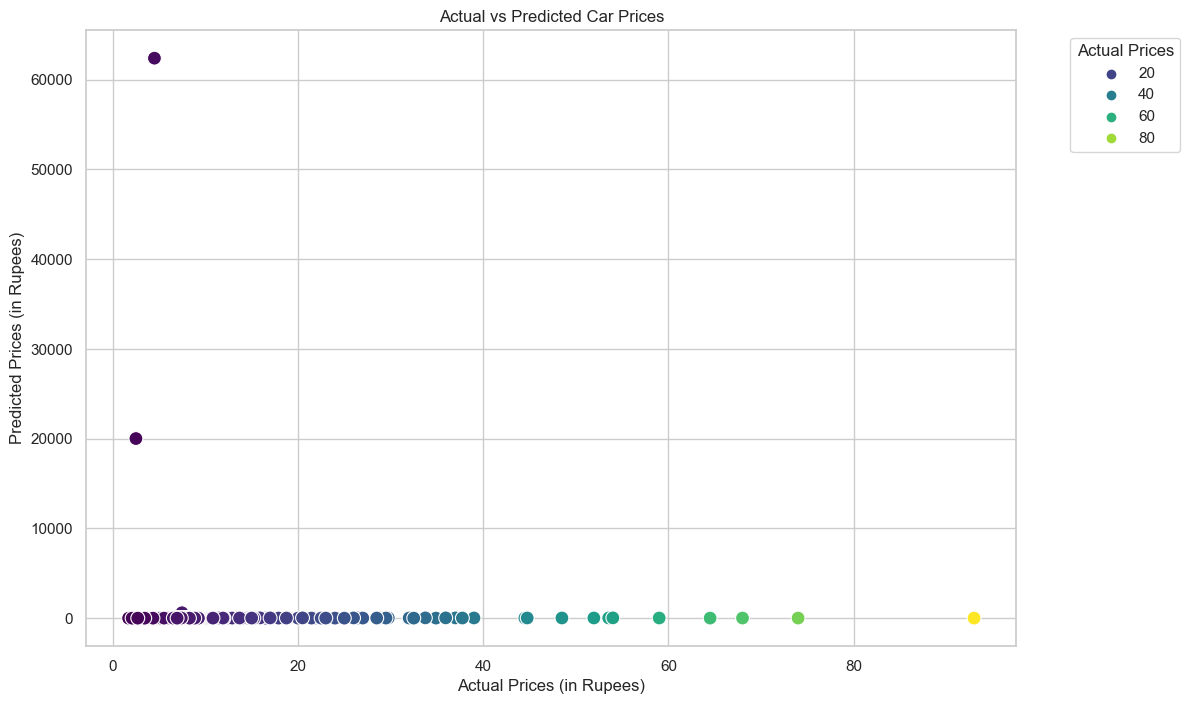

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for easier plotting
results_df = pd.DataFrame({'Actual Prices': Y_test, 'Predicted Prices': predictions})

# Plotting the actual vs predicted values with color and labels
plt.figure(figsize=(12, 8))
sns.scatterplot(data=results_df, x='Actual Prices', y='Predicted Prices', hue='Actual Prices', palette='viridis', edgecolor='w', s=100)
plt.title('Actual vs Predicted Car Prices')
plt.xlabel('Actual Prices (in Rupees)')
plt.ylabel('Predicted Prices (in Rupees)')

# Add a legend
plt.legend(title='Actual Prices', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()
